In [19]:
import pandas as pd

df = pd.read_csv(r"datasets\penguins_binary_classification.csv")
print("Dataset Shape:", df.shape)
print("\nFirst few rows of the dataset:")
df.head()

Dataset Shape: (274, 7)

First few rows of the dataset:


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,2007
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,2007
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,2007


### Drop `year` and `island` columns


In [2]:
# drop year and island columns
df = df.drop(columns=["year", "island"])
df.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
3,Adelie,36.7,19.3,193.0,3450.0
4,Adelie,39.3,20.6,190.0,3650.0


### Encode `species` column: `Adelie` -> 0, `Gentoo` -> 1

In [3]:
from sklearn.model_selection import train_test_split

df["species"] = df["species"].map({"Adelie": 0, "Gentoo": 1})
df.head()

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=["species"]),
    df["species"],
    random_state=2,
)

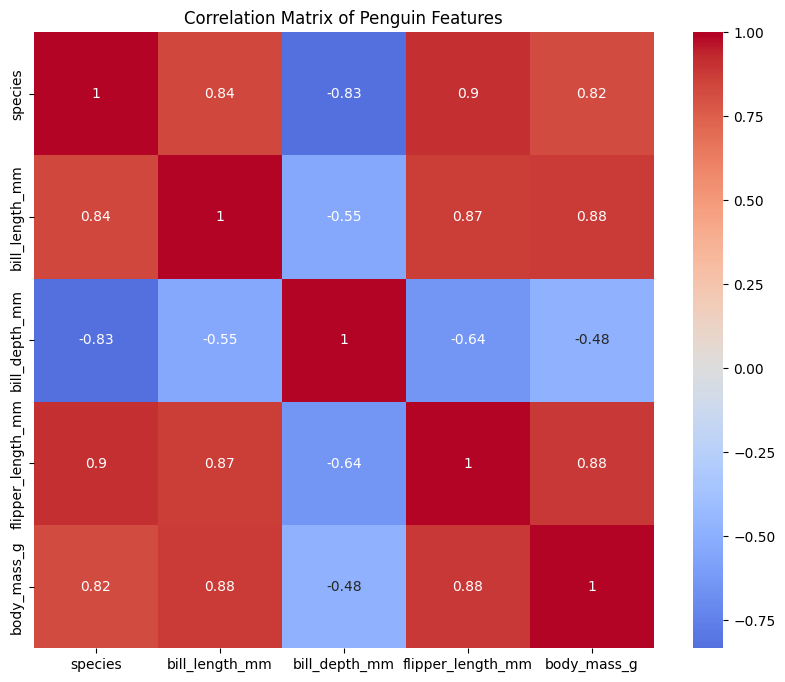

In [4]:
# take a look at the correlation matrix
import seaborn as sns
from matplotlib import pyplot as plt

corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix of Penguin Features")
plt.show()

It is clear that the dataset has a number of features that are highly correlated with each other.
Hence, we can not fully rely on default permutation importance approach.

### Train a Logistic Regression model and a Random Forest model

#### Scale the features using StandardScaler

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Train a Logistic Regression model

In [7]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)

LogisticRegression()

#### Train a Random Forest model

In [8]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier()

### Show coefficients of the Logistic Regression model

In [17]:
# show coefficients of the logistic regression model as a dataframe
pd.DataFrame(lr_model.coef_, columns=X_train.columns, index=["coefficients"])

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
coefficients,1.177369,-2.087803,1.578757,1.066307


#### Show feature importance of the Random Forest model

In [16]:
# show feature importance of the random forest model as a dataframe
pd.DataFrame(rf_model.feature_importances_.reshape(1, -1), columns=X_train.columns, index=["importance"])

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
importance,0.168779,0.289083,0.519918,0.022221


### Build SHAP explainer for Logitic Regression and Random Forest. For linear explainer use scaled X as masker

In [35]:
# Build SHAP explainer for Logitic Regression and Random Forest. For linear explainer use scaled X as masker
import shap

lr_explainer = shap.Explainer(lr_model, X_train_scaled, feature_names=X_train.columns)
rf_explainer = shap.Explainer(rf_model, X_train_scaled, feature_names=X_train.columns)

### Show SHAP values for the Logistic Regression model

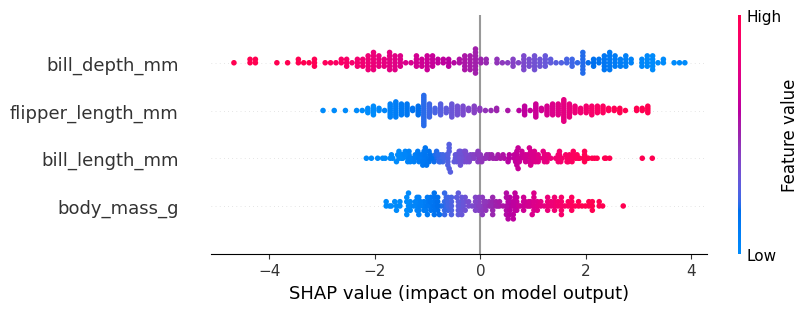

In [37]:
# Plot summary plot (beeswarm) for linear explainer with feature names as labels.
lr_shap_values = lr_explainer(X_train_scaled)
shap.plots.beeswarm(lr_shap_values)

#### Plot force plot for the first sample (index=1)

In [42]:
# Plot force plot for the first sample (index=1)
shap.initjs()
shap.plots.force(lr_shap_values[1])

#### Plot force plot for the second sample (index=2)

In [43]:
# Plot force plot for the second sample (index=2)
shap.plots.force(lr_shap_values[2])

### Plot beeswarm plots for both classes of Random Forest model

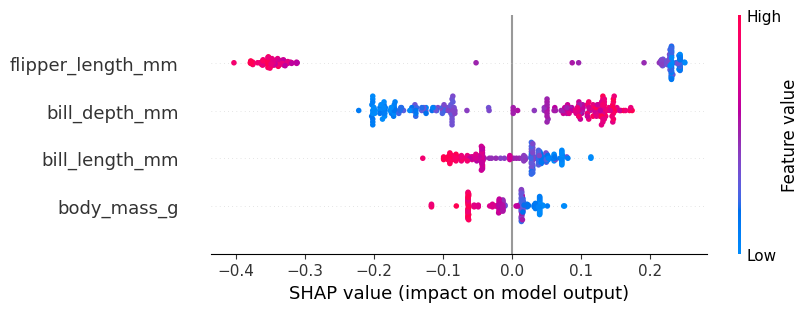

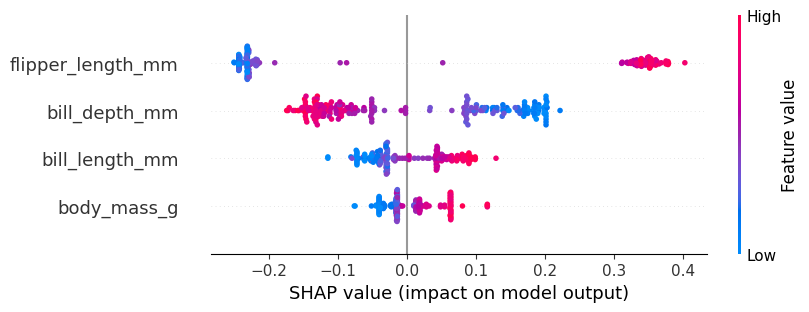

In [ ]:
# Plot beeswarm plots for both classes of Random Forest model
rf_shap_values = rf_explainer(X_train_scaled)

# Plot for class 0
shap.plots.beeswarm(rf_shap_values[:, :, 0])

# Plot for class 1
shap.plots.beeswarm(rf_shap_values[:, :, 1])
